# Ganesh Kumar

In [1]:
!pip install opendatasets --upgrade
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/gpreda/chinese-mnist'
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noctkun
Your Kaggle Key: ··········


100%|██████████| 16.5M/16.5M [00:01<00:00, 12.9MB/s]


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
IMAGE_PATH = "chinese-mnist/data/data/"
INFO_PATH = "chinese-mnist/chinese_mnist.csv"

In [4]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.imports import *

In [5]:
path = Path(IMAGE_PATH)
Path.BASE_PATH = path

df = pd.read_csv(INFO_PATH)
df["filename"] = ("input_"+df["suite_id"].astype(str)
                 +"_"
                 +df["sample_id"].astype(str)
                 +"_"
                 +df["code"].astype(str)
                 +".jpg")
df.head()

,suite_id,sample_id,code,value,character,filename
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


In [6]:
def get_x(r):
    return path/r['filename']

def get_y(r):
    return r["value"].astype(str).split(" ")

In [7]:
DATABLOCK_IMAGE_SIZE = 64
DATABLOCK_MIN_SCALE = 0.2

dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                   splitter = RandomSplitter(seed = 42),
                   get_x = get_x,
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(DATABLOCK_IMAGE_SIZE, 
                                                 min_scale = DATABLOCK_MIN_SCALE),)

dls = dblock.dataloaders(df)

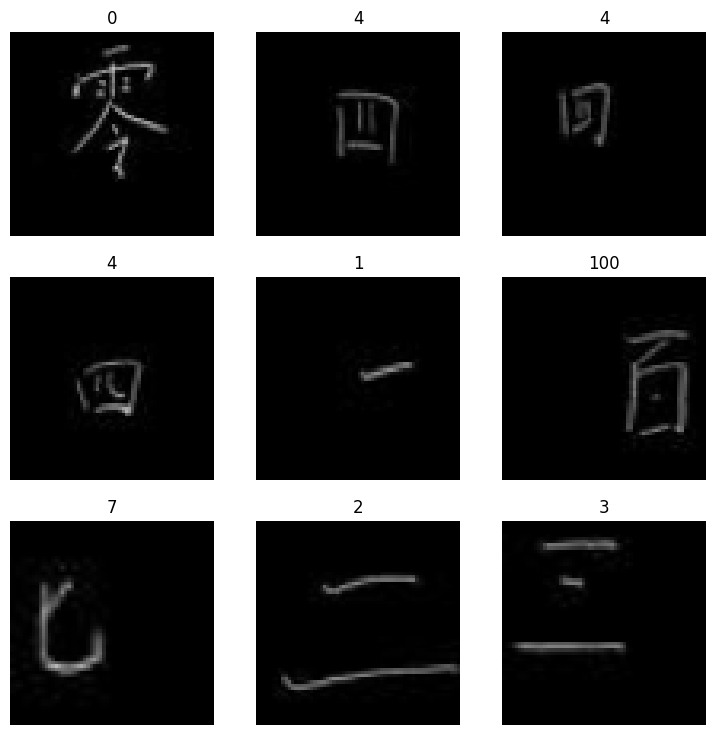

In [8]:
dls.show_batch()

In [9]:
THRESH = 0.2
FINE_TUNE_NUM  =2
BASE_RL = 3e-2

learn = cnn_learner(dls, resnet18, metrics = partial(accuracy_multi, thresh = THRESH))
learn.fine_tune(FINE_TUNE_NUM, base_lr = BASE_RL)

learn.unfreeze()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.172281,0.061197,0.971755,00:38


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.056868,0.019141,0.993667,00:28
1,0.029297,0.002891,0.999067,00:31


SuggestedLRs(valley=5.754399353463668e-06)

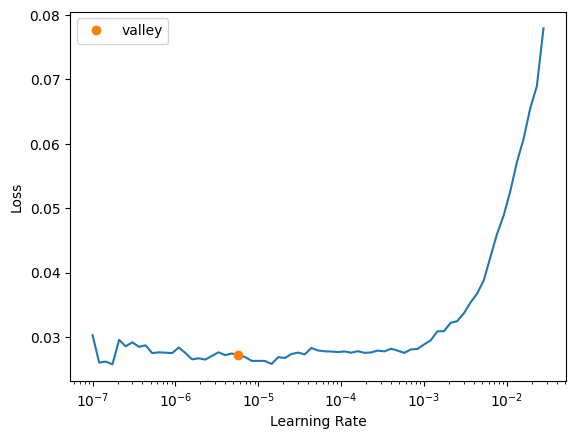

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(FINE_TUNE_NUM, 7.585775892948732e-05)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.021229,0.002347,0.999311,00:29
1,0.021678,0.002040,0.999378,00:28


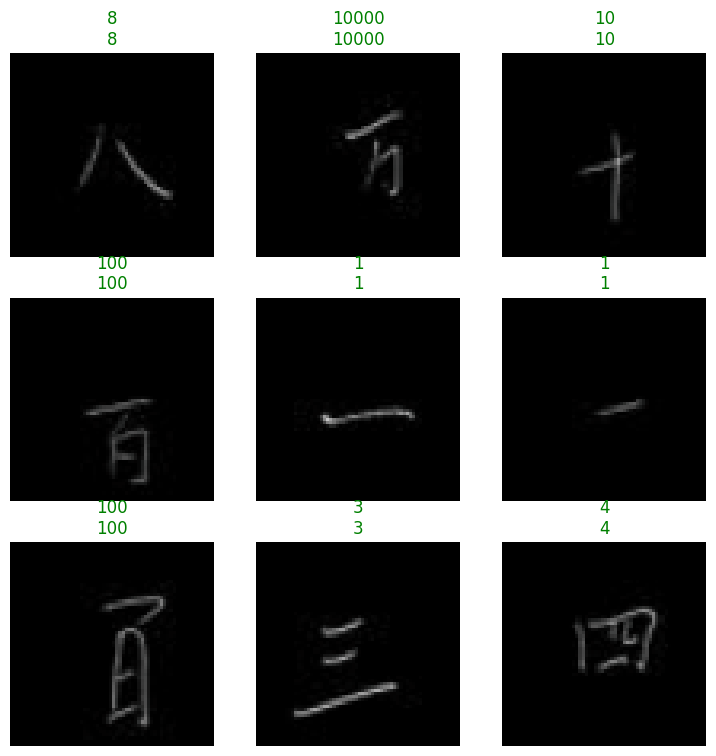

In [12]:
learn.show_results()